# Data Visualisation

At Peak, we peakify our outputs. _Orion_ provides us with an elegant way of doing that.

### 1. Installing Peak fonts

In [1]:
from orion.contrib.peak.style import install_peak_fonts, apply

In [2]:
install_peak_fonts()
apply()

### 2. Loading Colors

In [3]:
from orion.contrib.peak.style import PEAK_COLORS_1, PEAK_COLORS_2, PEAK_COLORS_3

<br>
<img src="resources/PEAK_COLORS.png">
<br>

### 3. Applying Peak Theme to Matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
from orion.sources import S3Source

flights = S3Source(
    bucket='kilimanjaro-prod-datalake', 
    key='newstarter/uploads/flights/1581525083144_Peak_flights.csv'
).read_csv()

In [6]:
top_aiports_by_num_flights = (
    flights
    .groupby('dest')['flight']
    .count()
    .reset_index()
    .rename(columns={'flight':'num_flights'})
    .sort_values('num_flights', ascending=False)
    .head(10)
)

<BarContainer object of 10 artists>

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


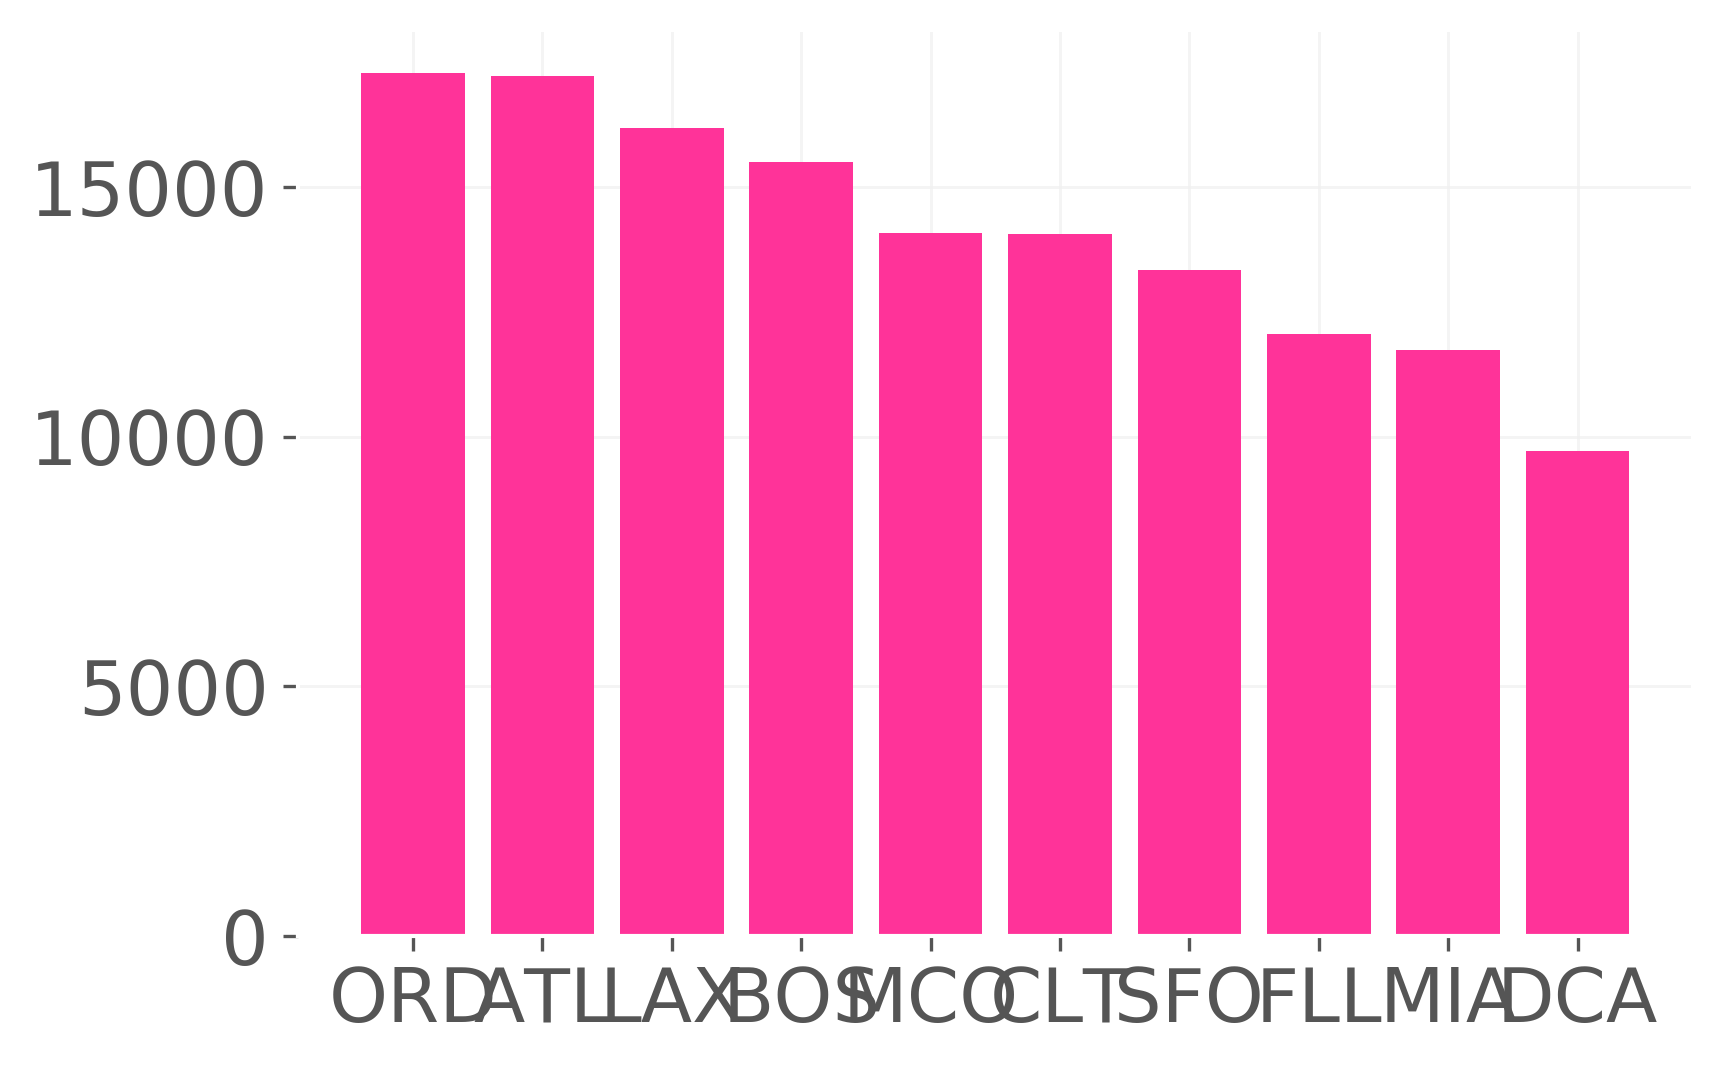

In [7]:
plt.bar(
    x=top_aiports_by_num_flights['dest'], 
    height=top_aiports_by_num_flights['num_flights']
)

Default `matplotlib` styling still doesn't hit the spot.. We need to tweak it a bit more to make it stand out!

By adjusting size of all elements and by adding axis labels we can immidiately see the difference. 

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


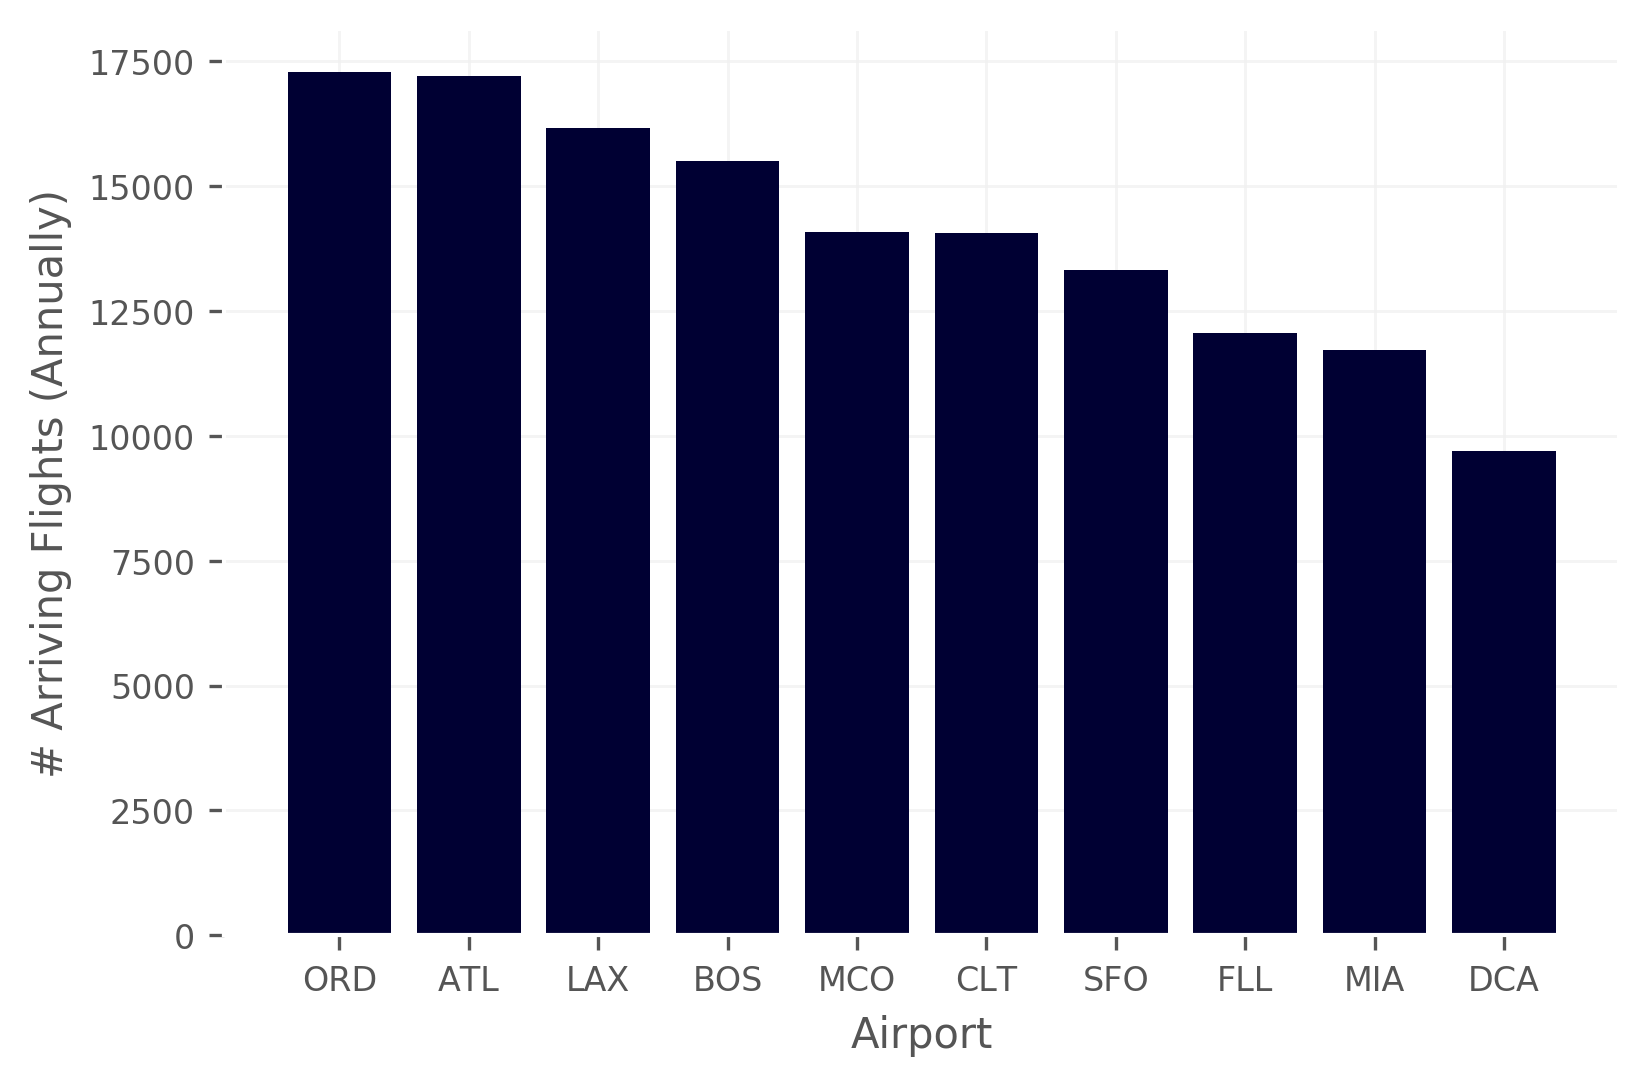

In [8]:
fig, ax = plt.subplots()

plt.bar(
    x=top_aiports_by_num_flights['dest'], 
    height=top_aiports_by_num_flights['num_flights'],
    color=PEAK_COLORS_1[4]
)

plt.xlabel('Airport', size=10)
plt.ylabel('# Arriving Flights (Annually)', size=10)
ax.tick_params(axis='both', which='major', labelsize=8)